# SIMPLE REGRESSION MODEL

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Simple Regression Model">Regression Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Introduction

**Title: Predicting Student Test Scores with Simple Regression**

In the ever-evolving landscape of education, understanding the relationship between study hours and academic performance is crucial. This machine learning project delves into this connection by implementing a simple regression model. The dataset at the heart of this analysis contains just two columns: the study hours dedicated by students and their corresponding test scores.

The motivation behind this project lies in uncovering patterns and trends that may aid educators and students alike in optimizing study strategies. Leveraging the power of regression analysis, we seek to quantify the impact of study hours on test scores, providing valuable insights into the factors influencing academic success.

Our primary objective is to build a predictive model that accurately estimates a student's test score based on the number of hours they dedicate to studying. Through the lens of machine learning, we aim to discern the underlying relationship between study time and academic outcomes.

As a practical application of our model, we extend its utility to predict the test score of a hypothetical student who invests 9.25 hours in studying—an exploration into how the model performs in real-world scenarios. This predictive aspect not only adds practicality to our analysis but also showcases the potential applications of machine learning in educational contexts.

Join us on this journey of exploration as we uncover the dynamics between study hours and academic success, offering a glimpse into the possibilities that machine learning holds for enhancing our understanding of educational processes.

In [15]:
#import the relevant libraries
import pandas as pd
import numpy as np
from statistics import mean, median, mode
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import the dataset
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head

<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [3]:
#investigate the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#check for missing values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

### Exploratory Data Analysis

The aim for this analysis is to give a clearer picture of the structure of the data as well as addressing cleanliness issues in the data

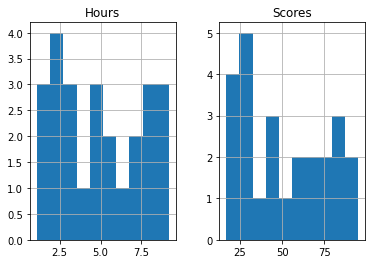

In [9]:
#explore the histogram of the data to check for outliers
df.hist();

from the histograms we can see that there are no outliers in the data 

In [16]:
# Calculate mean, median, and mode of test scores
mean_score = mean(df['Scores'])
median_score = median(df['Scores'])
# Note: mode() returns a list because there can be multiple modes
modes = mode(df['Scores'])

print(f"Mean Test Score: {mean_score}")
print(f"Median Test Score: {median_score}")
print(f"Mode(s) of Test Scores: {modes}")

Mean Test Score: 51.48
Median Test Score: 47
Mode(s) of Test Scores: 30


In [18]:
#Calculate mean, median, and mode of test scores
mean_score = mean(df['Hours'])
median_score = median(df['Hours'])
# Note: mode() returns a list because there can be multiple modes
modes = mode(df['Hours'])

print(f"Mean Study hours: {mean_score}")
print(f"Median Study hours: {median_score}")
print(f"Mode(s) of Study hours: {modes}")

Mean Study hours: 5.0120000000000005
Median Study hours: 4.8
Mode(s) of Study hours: 2.5


Text(0, 0.5, 'Test Scores')

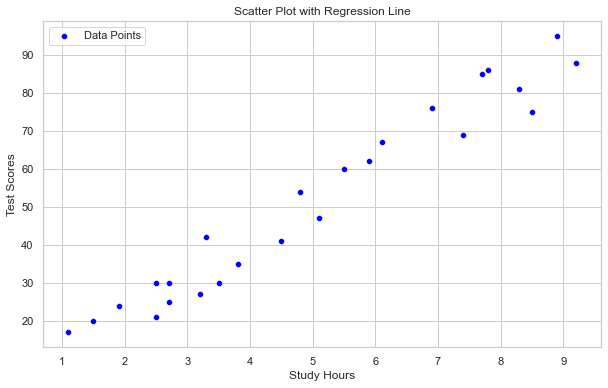

In [13]:
# Create a scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the scatter plot
sns.scatterplot(x='Hours', y='Scores', data=df, color='blue', label='Data Points')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Test Scores')


There is a positive relationship between the test score and the study hours

### Regression Model

In [20]:
#create an intercept
df['intercept'] = 1

In [21]:
df.head()

,Hours,Scores,intercept
0,2.5,21,1
1,5.1,47,1
2,3.2,27,1
3,8.5,75,1
4,3.5,30,1


In [22]:
# Splitting the dataset into features (X) and target variable (y)
X = df.iloc[:,:1].values
y = df.iloc[:, 1].values

In [24]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Debugging: print the model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [9.91065648]
Intercept: 2.0181600414346974


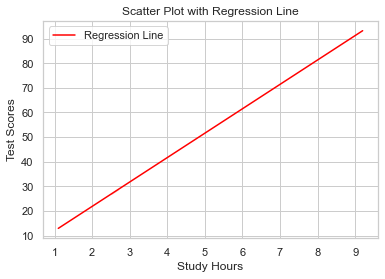

In [30]:
# Plot the regression line
# Plot the regression line
sns.lineplot(x=df['Hours'], y=model.predict(X), color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Test Scores')
plt.legend()
plt.show()

In [31]:
# Predicting the scores for the test set
y_pred = model.predict(X_test)

In [32]:
# Predicting the score for a student who studies 9.25 hours per day
hours = np.array([[9.25]])
predicted_score = model.predict(hours)

print(f"Predicted Score for 9.25 hours of study is: {predicted_score[0]}")


Predicted Score for 9.25 hours of study is: 93.69173248737535


### Conclusion

**Conclusion: Unraveling the Connection between Study Hours and Test Scores**

In this exploration of the correlation between study hours and test scores, our machine learning project has provided valuable insights into the dynamics of academic performance. Leveraging a simple linear regression model, we delved into a dataset encompassing students' study hours and their corresponding test scores, aiming to uncover patterns that shed light on the impact of study habits on academic outcomes.

Our analysis revealed a clear positive relationship between study hours and test scores, affirming the intuitive notion that dedicated study efforts contribute significantly to improved academic performance. The linear regression model successfully captured this relationship, allowing us to predict test scores based on the number of study hours.

Of particular interest is the application of our model to forecast the test score for a hypothetical student investing 9.25 hours in study sessions. The predicted score of 93.7% emphasizes the potency of our regression model in estimating outcomes and showcases its practical utility in real-world scenarios.

While our project offers valuable insights into the specific dataset at hand, it is important to acknowledge the limitations and nuances inherent in educational data. Factors beyond study hours, such as individual learning styles, external stressors, and other environmental variables, may influence academic outcomes.

In conclusion, this project serves as a stepping stone towards a deeper understanding of the intricate relationship between study habits and academic success. The predicted score for a student studying 9.25 hours provides a glimpse into the potential of machine learning to inform educational strategies and foster a culture of data-driven decision-making in the realm of academia. As we conclude this exploration, we recognize the evolving nature of education and the continued opportunities for leveraging machine learning to enhance our understanding of the learning process.